# Figure 6 

In [1]:
using PyPlot
using NBInclude
using Dates
@nbinclude("helper-functions.ipynb");

## Temperature - Lake and channel lowering  - Discharge @ P3

#### We import hourly discharge time series `qp3_hour_mean` @P3 with standard deviation

In [2]:
d, head = readdlm(path_products*"discharge_channel_hourly_std_deviation.csv" , ',', header=true);
qp3_hour_mean = d[:,2];
err_qp3_hour = d[:,3];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

#### We import daily discharge time series `qp3_daily` @P3 (with lake data to fill the gap) and `qout_lake_daily` (lake outlet)

In [3]:
d, head = readdlm(path_products*"discharge_channel_full_daily.csv" , ',', header=true);
qp3_daily = d[:,2];
t3_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

#Daily lake discharge
d, head = readdlm(path_products*"discharge_lake_daily.csv" , ',', header=true);
qout_lake_daily= d[:,2];
t_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

#### We import discharge from salt dilution 

In [4]:
#P3
d, head = readdlm(path_products*"discharge_P3.csv" , ',', header=true);
Qs3 = d[:,2];
err_Qs3 = d[:,3]
ts3 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];
#P2
d, head = readdlm(path_products*"discharge_P2.csv" , ',', header=true);
Qs2 = d[:,2];
err_Qs2 = d[:,3]
ts2 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];
#P1
d, head = readdlm(path_products*"discharge_P1.csv" , ',', header=true);
Qs1 = d[:,2];
err_Qs1 = d[:,3]
ts1 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

#We merge them all to make one single mean

ts = vcat(ts1,ts2,ts3)
Q = vcat(Qs1,Qs2,Qs3)
Qm=[]
Qm_err=[]
t_Qm=[]


for i in 1:length(ts) 
    tdiff = abs.(ts - ts[1])  #abs because otherwise there is negative value that fail the treshold
    indice = findall(x -> x < Dates.Minute(20), tdiff)   #20min as a treshold to gatjer the same injection
    push!(Qm, mean(Q[indice]))
    push!(Qm_err, std(Q[indice]))
    push!(t_Qm, ts[indice[1]])  #time of the injection more or less 20 min
    
    deleteat!(ts, indice)
    deleteat!(Q, indice)
    if length(ts) == 0  #break when ts is empty (this happen at i=31, fefore lenght(ts) then)
        break
    end
end 


#### We import `lake_level` time series

In [5]:
#lake level
d, head = readdlm(path_products*"Lake_level_corr_2019.csv" , ',', header=true);
level = d[:,2];
t = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]; #every 10 min

#We upscale to match the others hourly time series
lake_hour = upscale_timeseries(level, t, "hour")[1]
lake_level = upscale_timeseries(level, t, "hour")[2];

#We are interested on the drainage period only from 9th July 8am:
tstart = findfirst(x -> x == DateTime(2019,7,9,8), lake_hour)
lake_hour = lake_hour[tstart:end]
lake_level = lake_level[tstart:end];

#### We import channel elevation @P5 and P3, and daily inprint

In [6]:
#Field measures 
x5=[DateTime(2019,7,10,14,57),DateTime(2019,7,11,9,15),DateTime(2019,7,16,14),
   DateTime(2019,7,25,10,28),DateTime(2019,7,30,14,31),DateTime(2019,7,31,10,26),
    DateTime(2019,8,8,12,57),DateTime(2019,8,14,11,19),DateTime(2019,8,23,13,50),DateTime(2019,9,4,10,2)];
y5=[2732.67,2732.54,2731.74,2728.1,2726.24,2726.25,2725.43,2724.36,2724.27,2724.15];
uppererror = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.3;]
lowererror = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.3;]
errs = [lowererror;uppererror];

#daily imprint
date_dp5=DateTime(2019,7,16,14):Day(1):DateTime(2019,7,30,14,31)
dp5=[5.65,5.2,4.85,4.55,4.25,4,3.6,3.2,2.85,2.35,1.9,1.35,0.75,0.4,0]
dp5=dp5.+2726.24;  #to match field measurement, taken from reference elevation at P5

x3=[DateTime(2019,7,9,14,35),DateTime(2019,7,10,14,5),DateTime(2019,7,11,10,10),DateTime(2019,7,16,13,17),
    DateTime(2019,7,24,14,38),DateTime(2019,7,25,9,48),DateTime(2019,7,30,13,20),DateTime(2019,7,31,9,33),
    DateTime(2019,8,8,12),DateTime(2019,8,14,11,50),DateTime(2019,8,23,12,46),DateTime(2019,9,4,9,43)];
y3=[2732.59,2732.57,2732.62,2730.43,2728.38,2727.65,2726.11,2726.04,2725.38,2724.22,2723.83,2723.62];


#### We import temperature at P3 `temp3_hour` time series 

In [7]:
d, head = readdlm(path_products*"temp3_hour.csv" , ',', header=true);
temp3_hour = d[:,2] 
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

err_temperature53 = 0.05 #uncertainties for P5 and P3 sensors used for heat transfer calculation

0.05

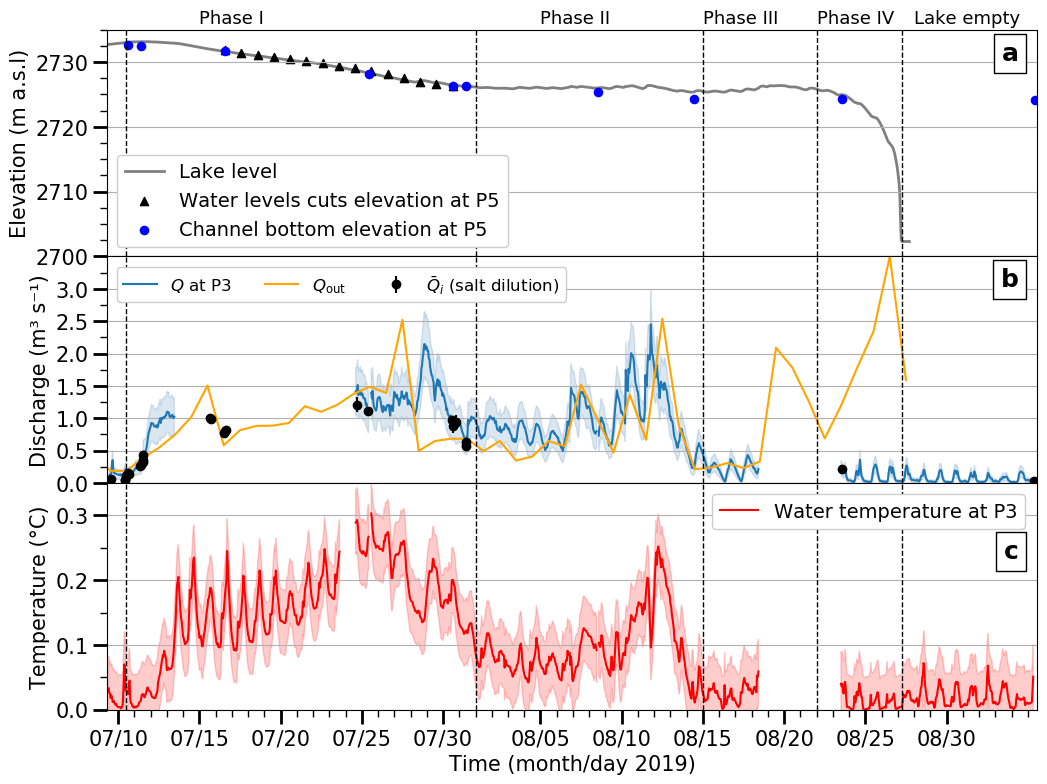

In [8]:
using PyPlot

pygui(false)

fig = figure("pyplot_figure",figsize=(12,10))

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 20,
        "axes.labelsize" => 15,
        "xtick.labelsize" => 15,
        "ytick.labelsize" => 15,
        "legend.fontsize" => 14,
)
merge!(rcParams, font0)




subplots_adjust(hspace=0.0) # Set the vertical spacing between axes


#Lake level

subplot(311) # Create the 1st axis of a 3x1 array of axes
plot(lake_hour,lake_level, color = "grey", linewidth=2, zorder=-1, label = "Lake level")
ax1 = gca()
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels
ax1.yaxis.grid(true)
#PyPlot.title("Title")
scatter(date_dp5,dp5 , color = "black", marker = "^", s = 35, label = "Water levels cuts elevation at P5")
#scatter(x3,y3, color = "b", marker = "o", s = 15, label = "Channel bottom elevation at P3")
scatter(x5,y5, color = "b", marker = "o", s = 35, label = "Channel bottom elevation at P5")
legend(framealpha=1,loc="lower left")
yticks(2700:10:2730) # Set the y-tick range and step size
ylim(2700,2735) # Set the y-limits 
ylabel("Elevation (m a.s.l)")
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
My = matplotlib.ticker.MultipleLocator(10) # Define interval of major ticks
ax1.yaxis.set_major_locator(My) # Set interval of major ticks
my = matplotlib.ticker.MultipleLocator(2.5) # Define interval of minor ticks
ax1.yaxis.set_minor_locator(my) # Set interval of minor ticks
ax1.yaxis.set_tick_params(which="major",length=10,width=2)
ax1.yaxis.set_tick_params(which="minor",length=5,width=1)
ax1.text(0.98, 0.95, "a", transform=ax1.transAxes, ha="right", va="top", weight="bold",fontsize=18
,bbox= bbox=Dict(:boxstyle=>"square",:facecolor=>"white", :alpha=>1))

#text
text(DateTime(2019,7,15), 2736,"Phase I", fontsize = 13)
text(DateTime(2019,8,5), 2736,"Phase II", fontsize = 13)
text(DateTime(2019,8,15), 2736,"Phase III", fontsize = 13)
text(DateTime(2019,8,22), 2736,"Phase IV", fontsize = 13)
text(DateTime(2019,8,28), 2736,"Lake empty", fontsize = 13)



    


# vspan to indicates the 2 different mode of drainage
#ax1.axvspan(DateTime(2019,7,10,12), DateTime(2019,8,15,0), facecolor="grey", alpha = 0.1, zorder = -2)
#ax1.axvspan(DateTime(2019,8,21), DateTime(2019,8,27,6), facecolor="grey", alpha = 0.1, zorder = -2)
axvline(x=DateTime(2019,7,10,12),linestyle="dashed",linewidth=1,color="black")
axvline(x=DateTime(2019,8,1),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,15),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,22),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,27,6),linestyle="--",linewidth=1,color="black")

#Discharge

subplot(312,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes
#salt dilution
#errorbar(ts3, Qs3, yerr=err_Qs3,markersize = 4, color="black",linestyle="",marker="o", label=string(L"\hat Q_i "," at P3"))
errorbar(t_Qm, Qm, yerr=Qm_err, linestyle="",markersize = 6,marker="o", color="black",label=string(L"\bar Q_i"," (salt dilution)"))
#continuous Q
plot(t3_hour,qp3_hour_mean, label = string(L"Q", " at P3"))
fill_between(t3_hour, qp3_hour_mean - err_qp3_hour, qp3_hour_mean + err_qp3_hour, alpha=0.2, color="steelblue")
#plot(t3_daily, qp3_daily, color = "b", label = "daily mean")
#Q_out
plot(t_daily,qout_lake_daily , color = "orange", label=string(L"Q_{\rm out}")) 
ax2 = gca()
setp(ax2.get_xticklabels(),visible=false) # Disable x tick labels
ax2.yaxis.grid(true)
ylabel("Discharge (m³ s⁻¹)")
ylim(0.0,3.5)
legend(bbox_to_anchor=(0.01, 0.8, 1., .102), loc=3, ncol=4, borderaxespad=0., framealpha=1, fontsize=12)
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax2.yaxis.set_major_locator(My) # Set interval of major ticks
my = matplotlib.ticker.MultipleLocator(0.25) # Define interval of minor ticks
ax2.yaxis.set_minor_locator(my) # Set interval of minor ticks
ax2.yaxis.set_tick_params(which="major",length=10,width=2)
ax2.yaxis.set_tick_params(which="minor",length=5,width=1)
yticks(0:0.5:3)
plt.yticks(fontsize= 15)
ax2.text(0.98, 0.95, "b", transform=ax2.transAxes, ha="right", va="top", weight="bold",fontsize=18
,bbox= bbox=Dict(:boxstyle=>"square",:facecolor=>"white", :alpha=>1))

# vspan to indicates the 2 different mode of drainage
#ax2.axvspan(DateTime(2019,7,10,12), DateTime(2019,8,15,0), facecolor="grey", alpha = 0.1, zorder = -2)
#ax2.axvspan(DateTime(2019,8,21), DateTime(2019,8,27,6), facecolor="grey", alpha = 0.1, zorder = -2)
axvline(x=DateTime(2019,7,10,12),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,1),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,15),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,22),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,27,6),linestyle="--",linewidth=1,color="black")

#Temperature

subplot(313,sharex=ax2) # Create the 3rd axis of a 3x1 array of axes
plot(t3_hour, temp3_hour, color = "red", label = "Water temperature at P3")
fill_between(t3_hour, temp3_hour .- err_temperature53, temp3_hour .+ err_temperature53, alpha=0.2, color = "r")
ax3 = gca()
ax3.yaxis.grid(true)
ylim(0,0.35)
ylabel("Temperature (°C)")
legend(framealpha=1,bbox_to_anchor=[0.65,0.95],loc=2,borderaxespad=0, fontsize = 14)
My = matplotlib.ticker.MultipleLocator(0.1) # Define interval of major ticks
ax3.yaxis.set_major_locator(My) # Set interval of major ticks
my = matplotlib.ticker.MultipleLocator(0.05) # Define interval of minor ticks
ax3.yaxis.set_minor_locator(my) # Set interval of minor ticks
ax3.yaxis.set_tick_params(which="major",length=10,width=2)
ax3.yaxis.set_tick_params(which="minor",length=5,width=1)
yticks(0:0.1:0.3)
plt.yticks(fontsize= 15)
ax3.text(0.98, 0.75, "c", transform=ax3.transAxes, ha="right", va="top", weight="bold",fontsize=18
,bbox= bbox=Dict(:boxstyle=>"square",:facecolor=>"white", :alpha=>1))

# vspan to indicates the 2 different mode of drainage
#ax3.axvspan(DateTime(2019,7,10,12), DateTime(2019,8,15,0), facecolor="grey", alpha = 0.1, zorder = -2)
#ax3.axvspan(DateTime(2019,8,21), DateTime(2019,8,27,6), facecolor="grey", alpha = 0.1, zorder = -2)
axvline(x=DateTime(2019,7,10,12),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,1),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,15),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,22),linestyle="--",linewidth=1,color="black")
axvline(x=DateTime(2019,8,27,6),linestyle="--",linewidth=1,color="black")

#x axis
xlabel("Time (month/day 2019)")
datemin = DateTime(2019,7,9,8)
datemax = DateTime(2019,9,4,14)
ax3.set_xlim(datemin, datemax) #xlim(DateTime(2019,7,9,8),DateTime(2019,9,4,14))




majorformatter = matplotlib.dates.DateFormatter("%m/%d")
majorlocator   = matplotlib.dates.DayLocator(bymonthday=(5,10,15,20,25,30))
minorlocator   = matplotlib.dates.DayLocator(interval=1)
fig[:autofmt_xdate](bottom=0.2,rotation=0,ha="center")

ax3.xaxis.set_major_formatter(majorformatter)
ax3.xaxis.set_major_locator(majorlocator)
ax3.xaxis.set_minor_locator(minorlocator)
ax3.xaxis.set_tick_params(which="major",length=10,width=2)
ax3.xaxis.set_tick_params(which="minor",length=5,width=1)


#suptitle("General figure title")

fig.canvas.draw() # Update the figure

#NOte: the daily mean here is not a "gliding average mean" but the mean avergaed on one day is set for midnight.. does it make sens ?
#To check on handmade up_scale function... an solution: advance of 12h to get the mean at midday

savefig(path_plots*"fig06.pdf") 
#savefig(path_plots*"figure_lake_canal_temp.png") 

matplotlib.rcdefaults()